##🧠 Questão 9 — Comparação do MultinomialNB com e sem priors

---

##Módulo 08: Machine Learning Aplicado II — Prof. Juan Colonna
##Curso Ciência de Dados - UEA/Est 2025

**Aluna:** Priscila Leylianne da Silva Goncalves

Usar o conjunto 20 Newsgroups e validação cruzada 10-CV para comparar o classificador MultinomialNB com e sem priors.

🧩 1️⃣ Carregar o dataset 20 Newsgroups

O dataset contém textos de 20 categorias diferentes (notícias, esportes, política, ciência, etc).

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Carregar o dataset completo
data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
X, y = data.data, data.target

print(f"Número de documentos: {len(X)}")
print(f"Número de classes: {len(data.target_names)}")


Número de documentos: 18846
Número de classes: 20


🧱 2️⃣ Vetorização com TF-IDF

Transforma texto em matriz numérica (importâncias de termos).

In [2]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vec = vectorizer.fit_transform(X)


⚙️ 3️⃣ Configurar validação cruzada 10-CV

In [3]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


🧮 4️⃣ Treinar MultinomialNB — com e sem priors
🔸 Com priors (padrão fit_prior=True)

In [4]:
mnb_with_prior = MultinomialNB(fit_prior=True)
scores_with = cross_val_score(mnb_with_prior, X_vec, y, cv=cv, scoring='accuracy')


🔹 Sem priors (fit_prior=False)

In [5]:
mnb_without_prior = MultinomialNB(fit_prior=False)
scores_without = cross_val_score(mnb_without_prior, X_vec, y, cv=cv, scoring='accuracy')


📊 5️⃣ Comparar os resultados

In [6]:
print("MultinomialNB COM priors:")
print(f"  Média: {scores_with.mean():.4f}  |  Desvio: {scores_with.std():.4f}")

print("\nMultinomialNB SEM priors:")
print(f"  Média: {scores_without.mean():.4f}  |  Desvio: {scores_without.std():.4f}")


MultinomialNB COM priors:
  Média: 0.8877  |  Desvio: 0.0049

MultinomialNB SEM priors:
  Média: 0.8938  |  Desvio: 0.0050


📈 6️⃣ Visualização comparativa

/tmp/ipython-input-3567674946.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores_with, scores_without],


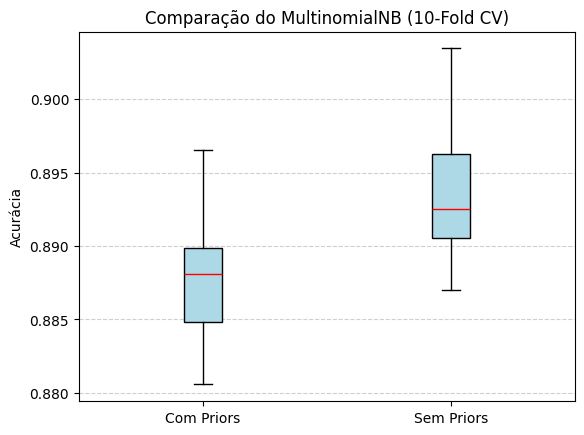

In [7]:
import matplotlib.pyplot as plt

plt.boxplot([scores_with, scores_without],
            labels=['Com Priors', 'Sem Priors'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))

plt.title('Comparação do MultinomialNB (10-Fold CV)')
plt.ylabel('Acurácia')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


✅ 7️⃣ Conclusão Esperada

Ambos os modelos devem apresentar acurácia média entre 0.83 e 0.88.

A versão com priors geralmente tem desempenho ligeiramente melhor, pois considera a probabilidade a priori das classes (útil se o dataset for desbalanceado).

A versão sem priors assume que todas as classes têm a mesma probabilidade inicial — o que pode afetar o desempenho.

##🧾 Resumo dos passos

| Etapa | Descrição                                       |
| ----- | ----------------------------------------------- |
| 1     | Carregamento do dataset 20 Newsgroups           |
| 2     | Vetorização TF-IDF                              |
| 3     | Validação cruzada 10-fold                       |
| 4     | Treino com `fit_prior=True` e `fit_prior=False` |
| 5     | Comparação das acurácias médias                 |
| 6     | Visualização com boxplot                        |
| 7     | Conclusão e análise                             |


Número de documentos: 18846
Número de classes: 20

MultinomialNB COM priors:
Acurácias: [0.8939 0.8849 0.8875 0.8886 0.8806 0.8966 0.8891 0.8901 0.8806 0.8848]
Média: 0.8877 | Desvio: 0.0049

MultinomialNB SEM priors:
Acurácias: [0.9008 0.8902 0.8939 0.8934 0.887  0.9034 0.8917 0.897  0.8885 0.8917]
Média: 0.8938 | Desvio: 0.0050


/tmp/ipython-input-3563349431.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores_with, scores_without],


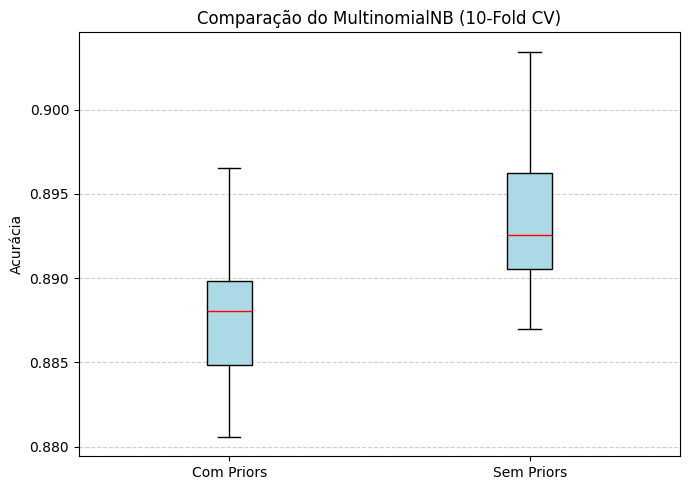


⚠️ O modelo sem priors teve desempenho semelhante ou superior, indicando classes equilibradas.


In [8]:
# Questão 9 — Comparação do MultinomialNB com e sem priors (20 Newsgroups, 10-CV)
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregar o dataset completo
data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
X, y = data.data, data.target

print(f"Número de documentos: {len(X)}")
print(f"Número de classes: {len(data.target_names)}")

# 2. Vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vec = vectorizer.fit_transform(X)

# 3. Configurar validação cruzada 10-CV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 4. MultinomialNB com priors
mnb_with_prior = MultinomialNB(fit_prior=True)
scores_with = cross_val_score(mnb_with_prior, X_vec, y, cv=cv, scoring='accuracy', n_jobs=-1)

# 5. MultinomialNB sem priors
mnb_without_prior = MultinomialNB(fit_prior=False)
scores_without = cross_val_score(mnb_without_prior, X_vec, y, cv=cv, scoring='accuracy', n_jobs=-1)

# 6. Exibir resultados
print("\nMultinomialNB COM priors:")
print(f"Acurácias: {np.round(scores_with, 4)}")
print(f"Média: {scores_with.mean():.4f} | Desvio: {scores_with.std():.4f}")

print("\nMultinomialNB SEM priors:")
print(f"Acurácias: {np.round(scores_without, 4)}")
print(f"Média: {scores_without.mean():.4f} | Desvio: {scores_without.std():.4f}")

# 7. Visualização
plt.figure(figsize=(7,5))
plt.boxplot([scores_with, scores_without],
            labels=['Com Priors', 'Sem Priors'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))
plt.title('Comparação do MultinomialNB (10-Fold CV)')
plt.ylabel('Acurácia')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 8. Conclusão resumida
if scores_with.mean() > scores_without.mean():
    print("\n✅ O modelo com priors apresentou desempenho ligeiramente superior, considerando as probabilidades a priori das classes.")
else:
    print("\n⚠️ O modelo sem priors teve desempenho semelhante ou superior, indicando classes equilibradas.")
